__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/pandasklar/blob/master/jupyter/12_Review_and_Visualize.ipynb)__

# Review and visualize
Review and visualize data that meets your criteria. <br>
This notebook raises errors for demonstration purpose.
* `plot`: Easier plot
* `check_mask`: Count rows filtered by a binary mask. Raises an error, if the number is unexpected.
* `specials`: Returns rows representing all special values per column.
* `sample`: Returns some sample rows: beginning + end + specials + random rows.
* `search_str`: Searches all str columns of a dataframe. Useful for development and debugging.
* `grid`: Visualize with dtale.
* `memory_consumption`: Returns the memory consumption of Python objects.

In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = /home/me/Data_Linux/Dropbox
environment['lib_path']     = /home/me/Data_Linux/Dropbox/31_Projekte/01_Python/libs
Start Time: 21:39:15


In [2]:
import numpy      as np
import pandas     as pd 
#import bpyth      as bpy

# pandasklar
try:
    import pandasklar as pak 
except ImportError as e:
    !pip install pandasklar
    import pandasklar as pak   
    
# verbose
pak.Config.set('VERBOSE', True)

grid = pak.grid

# copy_on_write
pd.set_option("mode.copy_on_write", True)

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions



## plot(): Easier plot

In [3]:
blab.help(pak.plot)

<class 'IPython.core.display.Markdown'>


<span style="font-size:larger;">plot(data, x=None, secondary_y=False, ylabel=None, subplots=False, figsize=None, inaccurate_limit=10000, **kwargs):</span>

Plots data. All parameters are passed to pandas.DataFrame.plot, but 
* data:             The data to plot. DataFrame, or list of Series, or any other data 
                    which can be converted to DataFrame by the pandasklar dataframe function.
                    Non-numeric columns are ignored (even for column positions). 
* x:                Which column to be used as x-axis. Column name or column position.
                    x=None -> The index is used as x.   
* secondary_y:      Which columns to plot on the secondary y-axis. 
                    Column name, column position or list of column names.
* figsize:          Size of a figure object. Default is (16,3) or (16,4), depending on the data.
* inaccurate_limit: From what size should the data be thinned randomly.
                    Uses pandasklars sample function, so minimums and maximums are kept.     

In [4]:
# Several types of random numbers, with parameters
size = 100
a = pak.random_series( size, 'ascending'                    )
b = pak.random_series( size, 'ascending'                    )
c = pak.random_series( size, 'descending'                   )
d = pak.random_series( size, 'descending'                   )
e = pak.random_series( size, 'perlin',     freq=2           )
f = pak.random_series( size, 'perlin',     freq=[16,1,8,1]  )
g = pak.random_series( size, 'perlin',     freq=[4,1,8,128] )

df = pak.dataframe( (a,b,c,d,e,f,g), verbose=False )
pak.sample(df)

,A,B,C,D,E,F,G
0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
21,0.590604,0.533595,0.651209,0.697705,1.000000,0.679380,-0.000095
56,0.752862,0.775496,0.381878,0.543148,-0.156283,-0.130866,-0.929099
59,0.752930,0.778161,0.364205,0.542662,-0.138628,0.218993,-1.000000
72,0.792855,0.779435,0.286938,0.532270,0.238913,1.000000,-0.402363
78,0.834260,0.804211,0.267676,0.526151,0.399166,-0.668263,-0.376844
94,0.964284,0.969231,0.070339,0.089953,0.223012,0.116285,0.523375
99,1.000000,1.000000,0.000000,0.000000,0.038391,0.148469,0.177321


<AxesSubplot: >

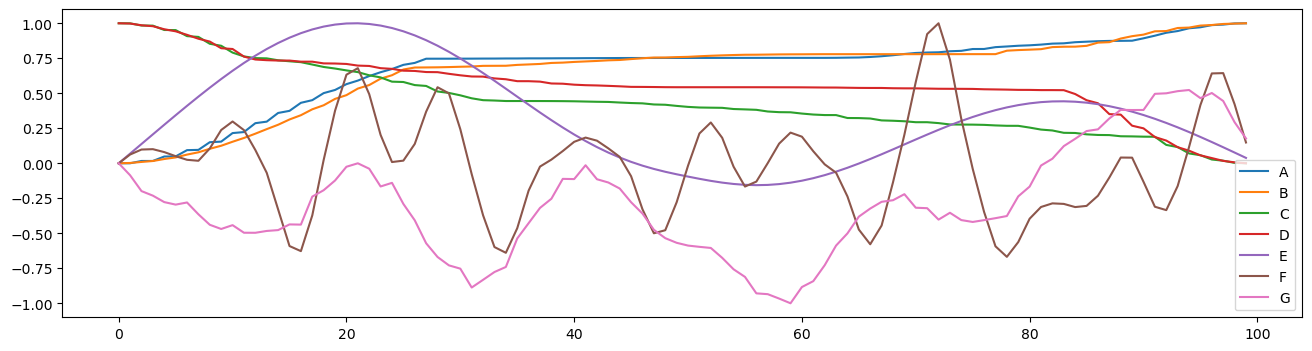

In [5]:
# just plot all together
%matplotlib inline
pak.plot(df)

<AxesSubplot: xlabel='G'>

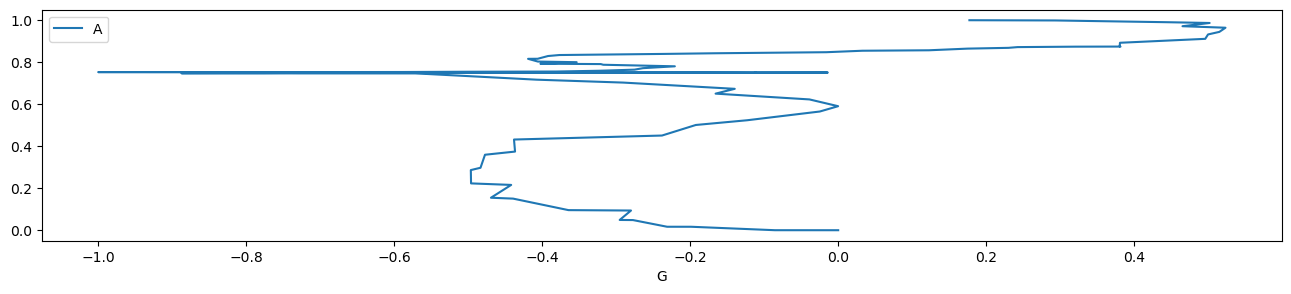

In [6]:
# plot 2 Series, use different y-axis
%matplotlib inline
pak.plot(df.A, df.G)

<AxesSubplot: >

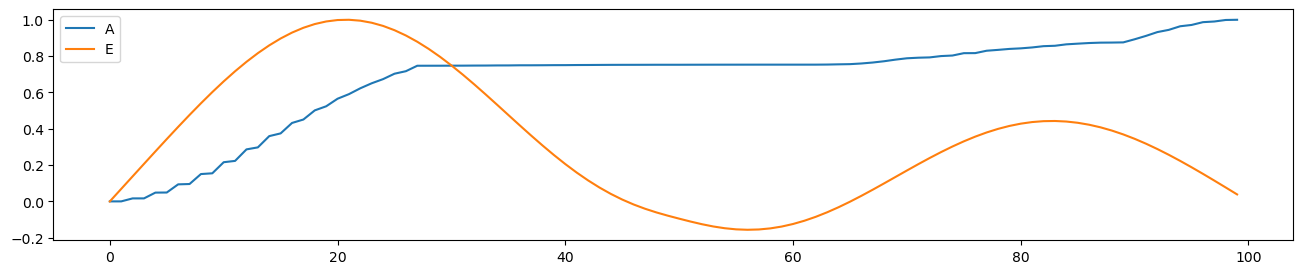

In [7]:
# plot E (Perlin) and A (ascending)
%matplotlib inline 
pak.plot(df[list('AE')])

<AxesSubplot: xlabel='A'>

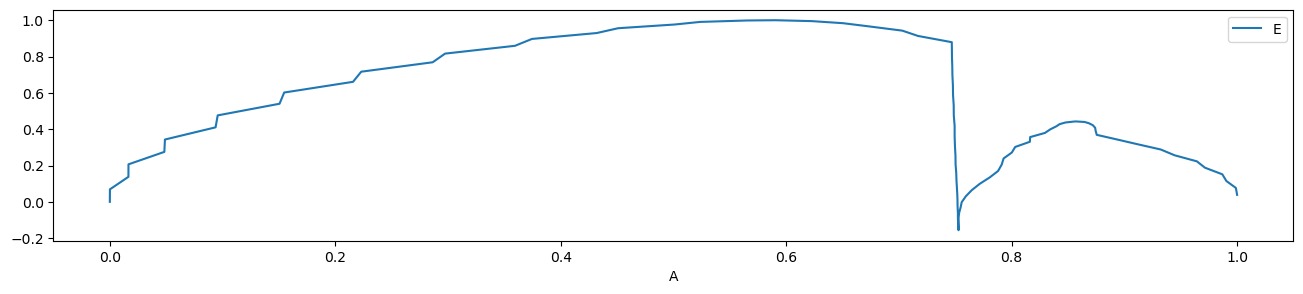

In [8]:
# plot E using A as x-Axis
%matplotlib inline 
pak.plot(df[list('AE')], x='A')

## specials(): Rows representing all special values per column

In [9]:
?pak.specials

Signature:
pak.specials(
    df,
    find=['head', 'first', 'min', 'most', 'max', 'nan', 'last', 'tail'],
    indicator=None,
    sort='index',
)
Docstring:
Returns rows representing all special values per column.
The resulting dataframe has the same minimums and maximums per column as the input dataframe, 
and if a column in the input contains NaNs the result will contain NaNs as well.
* find: List of what values are searched. 
  Possible values: 'head','first','min','most','max','nan','last','tail'
* indicator: Show additional column with a note, why the row is in the result
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/subsets.py
Type:      function


In [10]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))

In [11]:
a = pak.specials(df6, indicator='n')
a

,first_name,age,age_class,postal_code,birthplace,secret,features,history,n
0,Karina,28,20,19730,<NA>,vsuDCQe3R,"{J, Q}",[],head secret_first postal_code_first first_name...
1,Mathias,31,30,43425,Bremen,ceijwÖkfR,"{m, w, V}","[a, b, c]",age_most age_class_most age_class_last birthpl...
5,Nele,28,20,<NA>,Bremen,iIdmGEZFäE,"{4, 0}","[A, C, C, B]",postal_code_nan age_first age_class_first age_...
9,Emma,42,40,98454,Bremen,RiT7t,"{Z, 5, c, e}","[a, b, c]",age_max age_class_max birthplace_first birthpl...
29,Luca,20,20,15466,Berlin,8unpäY2ejA,"{k, G, 3}","[A, B, C, C]",age_min age_class_first age_class_min birthpla...
213,Adolf,35,30,23680,Berlin,an1ulw3,"{B, D, 0, m}","[A, B, C, C]",first_name_min age_class_most age_class_last b...
274,Hans,28,20,31561,Berlin,faQ5R,"{B, m, H, 1, q}","[A, B, C, C]",first_name_most age_first age_class_first age_...
281,Lennart,33,30,31077,Berlin,QX9rhr6,"{p, j, 4, 3}",[],postal_code_most age_class_most age_class_last...
358,Zoe,27,20,73059,Bremen,erIusvNo,"{R, c, J, D, 0}","[c, b, a]",first_name_max age_class_first age_class_min b...
658,Rudolph,26,20,99968,Berlin,fw2fSÖZ7,"{g, t, U, Y}","[A, x]",postal_code_max age_class_first age_class_min ...


## sample(): Returns some sample rows

In [12]:
?pak.sample

Signature: pak.sample(df, size=None)
Docstring:
Returns some sample rows.
Always the beginning and the end, 
plus the other specials() --see there--,
plus some random rows.
* size: Number of rows to return. If size=None, all specials() are returned.
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/subsets.py
Type:      function


In [13]:
# create test data

size = 10000 #00
df6 = pak.people(size)
df5 = df6.head(int(size/10))
df4 = df6.head(int(size/100))
df3 = df6.head(int(size/1000))
df = df4

In [14]:
pak.sample(df6,15)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Amelie,28,20,<NA>,Bremen,öMÄhzÖng,"{g, D, s, 3}","[c, b, a]"
1,Niklas,31,30,87210,Berlin,PqqC2iE0J,"{j, n, M, s}","[A, x]"
9,Adolf,23,20,57655,<NA>,xFjFRBOuo,"{v, C, w, r}","[c, b, a]"
41,Celina,20,20,20270,Bremen,VÄqtiI,"{l, j, W, N}","[A, B, C, C]"
60,Zoe,32,30,89694,<NA>,u8LXo,"{o, k, G, 3}","[A, B, C, C]"
117,Marie,42,40,96455,Berlin,bqsa1FuYU4,"{y, N}","[A, B, C, C]"
214,Phil,35,30,29720,Bremen,ixDXZVl,"{p, Y, B, V}","[A, C, C, B]"
311,Kay,23,20,98209,Bremen,CaFeXö2iH,"{g, f, m, X, 1}","[A, B, C]"
353,Renate,30,30,99999,Berlin,ypyqÜ5g,"{B, k, l, N}","[b, b, a, b]"
791,Niklas,35,30,73904,<NA>,00VÖohoKD,"{H, n, P, 2}","[A, C, C, B]"


In [15]:
pak.sample(df3,1005)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
0,Amelie,28,20,<NA>,Bremen,öMÄhzÖng,"{g, D, s, 3}","[c, b, a]"
1,Niklas,31,30,87210,Berlin,PqqC2iE0J,"{j, n, M, s}","[A, x]"
2,Sina,35,30,45788,Bremen,aDüivv,"{B, Y, o, Q, v}","[A, A, A]"
3,Charlotte,32,30,19887,Berlin,üf5Öi,"{T, h}","[A, C, C, B]"
4,Linda,34,30,76399,Bremen,EqPGu6qe,"{j, Z, T, V}","[b, b, a, b]"
5,Herta,35,30,36784,<NA>,A8gfÜNmÄ58,"{E, T, L, I, V}","[a, b, c]"
6,Natalie,24,20,23947,Bremen,iu6vzVaö,"{f, G}","[A, B, C, C]"
7,Alina,29,20,10583,Bremen,rScx8Je,"{G, r, z, 3}","[A, B, C]"
8,Stephan,38,30,40904,Berlin,J0mnoBz,"{H, S, O, G}",[]
9,Adolf,23,20,57655,<NA>,xFjFRBOuo,"{v, C, w, r}","[c, b, a]"


## search_str(): Searches all str columns of a dataframe

In [16]:
?pak.search_str

Signature: pak.search_str(df, find, without=[])
Docstring:
Searches all str columns of a dataframe.
Useful for development and debugging.
* find:    What is to be found?                  String or list of strings.
* without: Which columns should not be searched? String or list of strings.    
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [17]:
# create mask: most frequent first_name
find = ['Hamburg', pak.most_freq_elt(df.first_name)]
print('search for',find)

search for ['Hamburg', 'Adolf']


In [18]:
pak.search_str(df, find)

,first_name,age,age_class,postal_code,birthplace,secret,features,history
9,Adolf,23,20,57655,<NA>,xFjFRBOuo,"{v, C, w, r}","[c, b, a]"


## check_mask(): Count rows filtered by a binary mask

In [19]:
?pak.check_mask

Signature:
pak.check_mask(
    df,
    mask,
    expectation_min=None,
    expectation_max=None,
    msg='',
    stop=True,
    manually=False,
    verbose=None,
)
Docstring:
Count rows filtered by a binary mask.
Raises an error, if the number is unexpected.
* manually:    For debugging: If you just want to see the effect of a mask, without raising anything, add manually=True.

Examples:
check_mask( df, mask )         # just show the number of rows   
check_mask( df, mask, 2000 )   # checks for about 2000 rows (if not 0: not more than double, not less than half)
check_mask( df, mask, 0 )      # checks for exactly 0 rows    
check_mask( df, mask, 10, 50)  # checks for 10..50 rows

Example with later raise:
error = check_mask(df, mask, 214, stop=False)        
grid(df, mask, error)        
bpy.raise_if(error)
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/develop.py
Type:      function


In [20]:
# define mask
mask = (df.age >= 30)  &  (df.age < 40) 
#df[mask]

In [21]:
# just show the number of rows
pak.check_mask(df, mask)

check_mask:  62 rows


In [22]:
# checks for about 50 rows
pak.check_mask(df, mask, 50)

check_mask:  62 rows


In [23]:
# checks for about 50 rows
pak.check_mask(df, mask, 50, verbose=True)

check_mask:  62 rows


In [24]:
# checks for 0..100 rows
pak.check_mask(df, mask, 0, 100)

check_mask:  62 rows


## grid(): Visualize with dtale

In [25]:
?grid

Signature:
grid(
    df,
    mask=None,
    error='€€€',
    color='blue',
    backend=None,
    without=None,
    **kwargs,
)
Docstring:
Visualization of a DataFrame using dtale.
* df:       DataFrame to show
* mask:     Binary mask, function or Searchstring to reduce the number of rows
* error:    Error message
* color:    Color of the error message.
* backend:  'dtale' or None for dTale
* without:  Columns to ignore
* kwargs: Options for dtale. See https://github.com/man-group/dtale#instance-settings
          Caution: This will affect all grids in this notebook...
dtale may not work in a multiscreen setting on windows.

=== Examples ===
grid(df)                        # show all rows
grid(df,mask)                   # show with binary mask    
grid(df,sample)                 # show with functionally mask

=== For error indication after check_mask ===
error = check_mask(df, mask, 900, stop=False)
grid(df, mask, error) 
and later: raise_if(error)
File:      ~/Data_Linux/Dropbox/31_Pro

In [26]:
# show
grid(df)

100 rows


### grid(): Use mask

In [27]:
# Function as mask
grid(df, pak.sample)

11 rows out of 100


In [28]:
# Binary mask
mask = df.age > 25
grid(df, mask)

89 rows out of 100


### grid() options
Some grid options are global, e.g. max_column_width. If you set this option to a value later in your notebook, all grids in the notebook are rendered with this column_width. If you find a way to change this, send me a message.

In [29]:
# global Settings
pak.set_grid(max_column_width=200)

In [30]:
# show 
grid(df)

100 rows


### grid(): Advanced Formating
See options on https://github.com/man-group/dtale#instance-settings

In [31]:
mask = df.age > 25
grid(df, mask, sort=[('first_name','ASC')], background_mode='heatmap-col-age')
#grid(df, mask, drop_index=True,)

89 rows out of 100


### grid(): Special cases

In [32]:
# No DataFrame
grid(None)

Nothing to show


In [33]:
# Empty DataFrame
d = pd.DataFrame()
grid(d)

No rows


In [34]:
# 100% filtered 
mask = df.age > 1000
grid(df,mask)

No rows, mask filters them all away


In [35]:
# 100% filtered, and this is good
mask = df.age > 1000
grid(df,mask, color='green')

No rows, mask filters them all away


In [36]:
# 100% filtered, and this is bad
mask = df.age > 1000
grid(df,mask, color='red')

No rows, mask filters them all away


### grid() & check_mask(): Show error rows and raise later

In [37]:
# define a mask that contains errors
# say our error is df.birthplace == 'Hamburg',
# we don't want that to happen,
# but if it happens we would like to see the rows
mask = df.birthplace == 'Hamburg'
pak.check_mask(df,mask)

check_mask:  0 rows


In [38]:
# checking for 0 raises an error, as we want.
# But we don't see the rows affected
pak.check_mask(df,mask, 0)

check_mask:  0 rows


In [39]:
# so we use this to show the error rows first
error = pak.check_mask(df,mask, 0, stop=False)
grid(df, mask, error) 

check_mask:  0 rows
No rows, mask filters them all away


In [40]:
# and raise later
bpy.raise_if(error)

## memory_consumption

In [41]:
?pak.memory_consumption

Signature: pak.memory_consumption(iteration_of_objects, limit=10, use_rtype=True)
Docstring:
Returns the memory consumption of Python objects.
* iteration_of_objects: can be e.g. a DataFrame or just locals()
* limit: Limits the output size
* use_rtype: Use rtype instead of type?

For the memory consumption of the biggest 10 local variables call:
bpy.memory_consumption( locals() )
File:      ~/Data_Linux/Dropbox/31_Projekte/01_Python/git/pandasklar/src/pandasklar/analyse.py
Type:      function


In [42]:
# All local variables
r = pak.memory_consumption( locals() )
r

,name,rtype,size
0,df6,"(DataFrame, Series)",5.7 MB
1,df5,"(DataFrame, Series)",590.2 KB
2,df,"(DataFrame, Series)",58.4 KB
3,df4,"(DataFrame, Series)",58.4 KB
4,a,"(DataFrame, Series)",11.0 KB
5,_11,"(DataFrame, Series)",11.0 KB
6,_14,"(DataFrame, Series)",8.9 KB
7,df3,"(DataFrame, Series)",5.9 KB
8,_15,"(DataFrame, Series)",5.9 KB
9,Stop,"(type,)",1.0 KB


In [43]:
# If you give a DataFrame, it will return the column sizes
pak.memory_consumption( df )

,name,rtype,size
0,features,"(Series, set, str)",31.0 KB
1,secret,"(Series, str)",8.0 KB
2,history,"(Series, list, str)",7.2 KB
3,first_name,"(Series, str)",6.3 KB
4,birthplace,"(Series, str)",5.6 KB
5,postal_code,"(Series, NAType)",644.0 B
6,age,"(Series, int8)",344.0 B
7,age_class,"(Series, int8)",344.0 B
